## import basic packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
# Change the style of plot
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
save_folder = "../figures/heart_attack/"
os.path.isdir(save_folder)

True

# Understanding the dataset

## read the dataset

In [3]:
filename = '../datasets/heart.csv'
df = pd.read_csv(filename)

## Features

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

> Value 1: typical angina 

> Value 2: atypical angina

> Value 3: non-anginal pain

> Value 4: asymptomatic

> trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

>Value 0: normal

>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
print("number of missing values per feature",df.isnull().sum())

number of missing values per feature age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [5]:
#Check if there is a duplicate row 
print("number of duplicate row: ",df.duplicated().sum())

number of duplicate row:  1


In [6]:
#remove duplicates 
df=df.drop_duplicates(keep="first")

In [7]:
print("length of the dataset : ", df.shape[0])
print("number of features : ", df.shape[1])

length of the dataset :  302
number of features :  14


In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", categorial_features)
print("The continuous cols are : ", continuous_features)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [10]:
#get the data distribution of the categorical features 
df[continuous_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


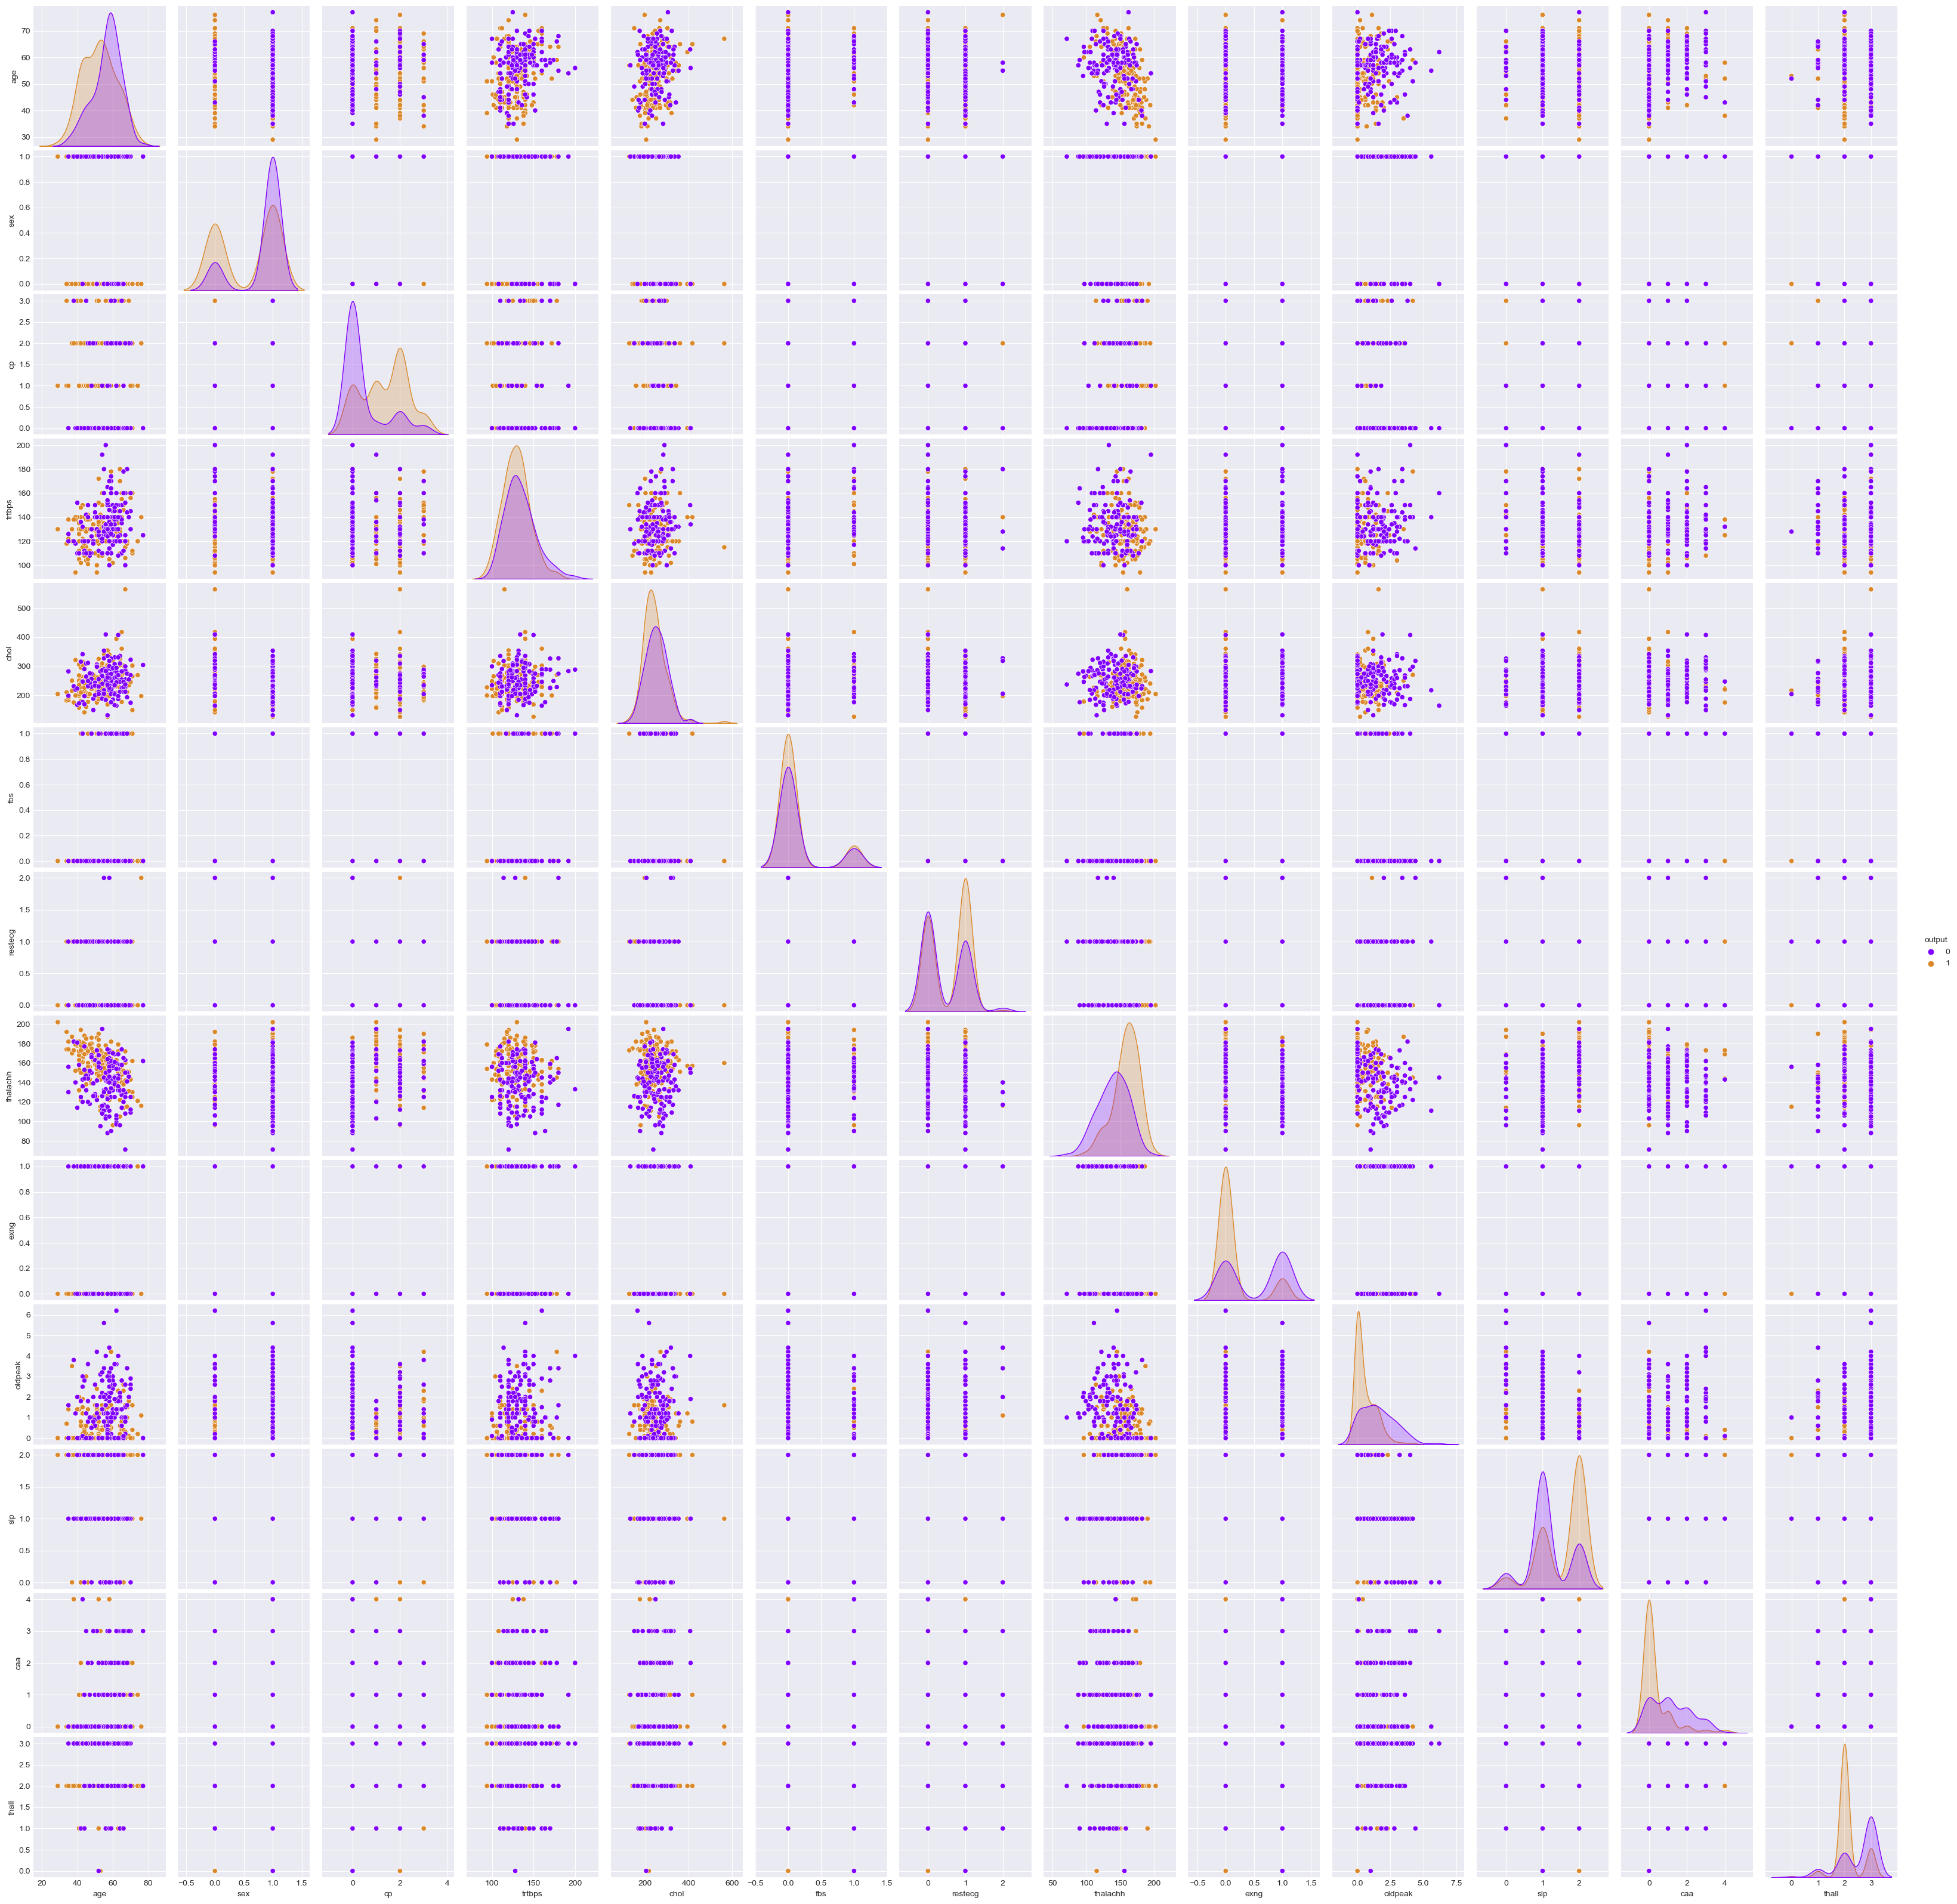

In [23]:
pairplot = sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
pairplot.savefig(save_folder+"pair_plot.png")
plt.show()

In [11]:
df_corr = df.corr().transpose()

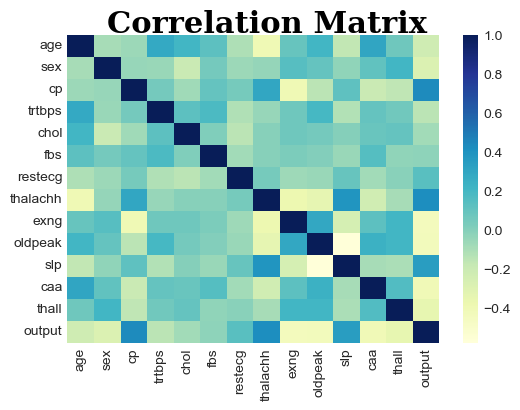

In [12]:

fig = plt.figure(figsize=(6,4))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
correlation= sns.heatmap(df_corr,fmt=".1f",annot=False,cmap='YlGnBu')
fig = correlation.get_figure()
fig.savefig(save_folder+"Correlation_full_small.pdf")
plt.show()


In [12]:
df_corr_output = df_corr.iloc[:,-1]
print("correlations between features and hear attach: ",df_corr_output)

correlations between features and hear attach:  age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
output      1.000000
Name: output, dtype: float64


In [13]:
df_corr[['output']].transpose()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
output,-0.221476,-0.283609,0.43208,-0.146269,-0.081437,-0.026826,0.134874,0.419955,-0.435601,-0.429146,0.34394,-0.408992,-0.343101,1.0


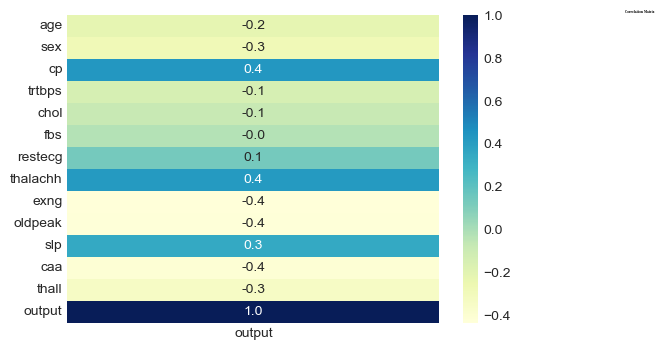

In [16]:
fig = plt.figure(figsize=(6,4))
# gs = fig.add_gridspec(1,1)
# gs.update(wspace=0.3, hspace=0.1)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=2, fontweight='bold', fontfamily='serif', color="#000000")
correlation_reduced = sns.heatmap(df_corr[['output']],fmt=".1f",annot=True,cmap='YlGnBu')
fig = correlation_reduced.get_figure()
fig.savefig(save_folder+"Correlation_reduced.pdf")

In [14]:
# x_pos = np.arange(len(df_corr_output.index[:-1]))
# labels = df_corr_output.index[:-1]
# # Build the plot
# fig, ax = plt.subplots(figsize=(12,5))

# ax.bar(x_pos, df_corr_output.values[:-1], align='center', alpha=0.8)
# ax.set_ylabel('correlation')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(labels)
# ax.set_title('correlations of features to heart attack')
# ax.yaxis.grid(True)
# # plt.grid()

# # Save the figure and show
# # plt.tight_layout()
# # plt.savefig('bar_plot.png')
# plt.show()

In [14]:
df_copy = df.copy()
df_copy.iloc[:,-1].replace(0,"less likely",inplace=True)
df_copy.iloc[:,-1].replace(1,"more likely",inplace=True)
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,more likely
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,more likely
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,more likely
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,more likely
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,more likely


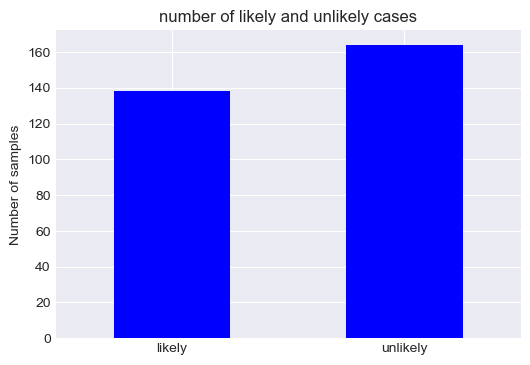

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
df_copy = df.copy()
df_copy.iloc[:,-1].replace(0,"likely",inplace=True)
df_copy.iloc[:,-1].replace(1,"unlikely",inplace=True)
df_copy.iloc[:,-1].value_counts().sort_index().plot(ax=ax, kind='bar', rot=0, title = "number of likely and unlikely cases",color='blue')
# plt.xlabel("Heart Atta")
plt.ylabel("Number of samples")
plt.savefig(save_folder+ "Class_Distribution.pdf")
plt.show()
# plt.close()

# preprocessing: preparing the data

In [15]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [47]:
# creating a copy of df
df1_copy = df_copy

# define the columns to be encoded and scaled (defined before)
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns (one hot encoding)
df1_copy = pd.get_dummies(df1_copy, columns = categorial_features, drop_first = True)

# seperate features with target
X = df1_copy.drop(['output'],axis=1)
y = df1_copy[['output']]
# instantiating the scaler
scaler = RobustScaler()
# scaler = StandardScaler()

# scaling the continuous featuree
X[continuous_features] = scaler.fit_transform(X[continuous_features])


In [48]:
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [49]:
#separate data for testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
y_train = y_train.squeeze(1)
y_test = y_test.squeeze(1)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (226, 13)
The shape of X_test is        (76, 13)
The shape of y_train is       (226,)
The shape of y_test is        (76,)


## Neural networks

In [38]:
# param_grid = [
#         {
#             'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#             'solver' : ['lbfgs', 'sgd', 'adam'],
#             'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ],
#             'hidden_layer_sizes': [(10,),(30,),(100,),(200,),(5,5),(5,10),(10,20),(20,30),(30,40),(40,50),(100,100),(200,200),(100,100,100)],
#             'alpha': 10.0 ** -np.arange(1, 5),
#             'random_state':[102,7,88,91]
#         }
#        ]
# clf = GridSearchCV(MLPClassifier(), param_grid, cv=6,
#                            scoring='accuracy',n_jobs=-1)
# # clf = MLPClassifier(solver='adam', learning_rate_init=1e-3,hidden_layer_sizes=(50, ), random_state=102)
# clf.fit(X_train,y_train.squeeze(1))

# print("Best parameters set found on development set:")
# print(clf.best_params_)


In [ ]:
# clf.best_score_

In [85]:
clf = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=1000)
%timeit clf.fit(X_train,y_train)
# predicting the values
%timeit y_pred = clf.predict(X_test)

964 ms ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.11 ms ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


0.8375956284153006
0.8852459016393442
0.03283084484713015


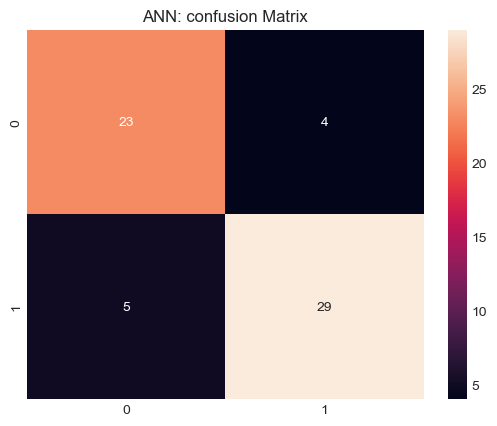

In [140]:
clf = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=1000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
# printing the test accuracy
# print("The test accuracy score of Neural Net is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("ANN: confusion Matrix")
fig = confusion.get_figure()
fig.savefig(save_folder+"ANN_confusion.pdf")
cv_result = cross_val_score(clf,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

In [25]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 15)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(6,4))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converge

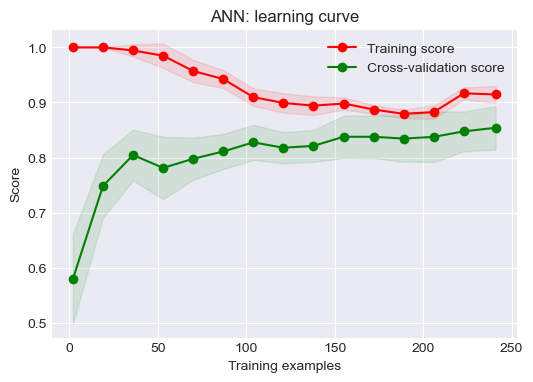

In [146]:
clf2 = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(100,100 ),activation='relu', random_state=7,max_iter=3000)
title = 'ANN: learning curve'
plt = plot_learning_curve(clf2,title,X,y.squeeze(1),n_jobs=-1)
plt.savefig(save_folder+ "ANN_learning_curve.pdf")
plt.show()


In [50]:
iterations = list(np.arange(1,300,10))
solvers = ['lbfgs', 'sgd', 'adam']
# mlp_train, mlp_test = np.zeros(len(iterations)), np.zeros(len(iterations))
cv_mean, cv_std = np.zeros((len(solvers),len(iterations))), np.zeros((len(solvers),len(iterations)))
for i,solver in enumerate(solvers):
    for j,iteration in enumerate(iterations):
        clf = MLPClassifier(solver=solver, alpha=0.1,learning_rate_init=1e-3,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=iteration)
    #     clf2 = clf2.fit(X_train, y_train)
    #     mlp_train[count] = clf2.score(X_train, y_train)*100
    #     mlp_test[count] =  clf2.score(X_test,y_test)*100
        cv_result = cross_val_score(clf,X,y.squeeze(1)) # uses R^2 as score 
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std(),1)
        
                                                                    

# plt.savefig(outputFolder + dataSet + " Score vs. Epochs.png")
# plt.clf()
# plt.close()

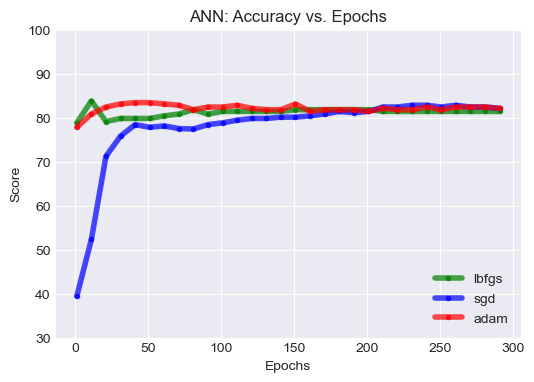

In [51]:
plt.figure(figsize=(6,4))
plt.plot(iterations, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="lbfgs")
plt.fill_between(iterations,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(iterations, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="sgd")
plt.fill_between(iterations,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(iterations, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="adam")
plt.fill_between(iterations,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")
plt.legend(loc='lower right')
ax = plt.gca()
ax.set_ylim([30, 100])
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("ANN: Accuracy vs. Epochs")
# plt.show()
plt.savefig(save_folder+ "ANN  Accuracy vs. Epochs.png")

In [132]:
lrs = [1e-5,1e-4,1e-3,1e-2,1e-1,1.0,10]
lrs.reverse()
slovers = ['lbfgs', 'sgd', 'adam']
# mlp_test_lr = np.zeros((len(slovers),len(lrs)))
cv_mean = np.zeros((len(slovers),len(lrs)))
cv_std = np.zeros((len(slovers),len(lrs)))
for i,solver in enumerate(slovers):
    for j, lr in enumerate(lrs):
        clf = MLPClassifier(solver=solver, alpha=0.1,learning_rate_init=lr,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=300)
#         clf2 = clf2.fit(X_train, y_train)
#         mlp_test_lr[i,j] =  clf2.score(X_test,y_test)*100
        cv_result = cross_val_score(clf,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)


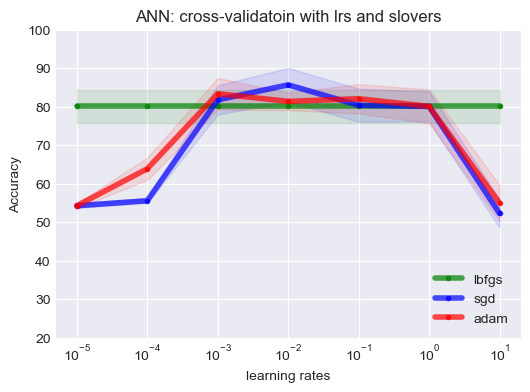

In [133]:
plt.figure(figsize=(6,4))
plt.plot(lrs, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="lbfgs")
plt.fill_between(lrs,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(lrs, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="sgd")
plt.fill_between(lrs,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(lrs, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="adam")
plt.fill_between(lrs,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")

plt.legend(loc='lower right')
ax = plt.gca()
ax.set_ylim([20, 100])
ax.set_xscale('log')
plt.xlabel("learning rates")
plt.ylabel("Accuracy")
plt.title("ANN: cross-validatoin with lrs and slovers")
# plt.show()
plt.savefig(save_folder+ "ANN cross validatoin with lrs and slovers.pdf")

In [126]:
def n_params(model):
    """Return total number of parameters in a 
    Scikit-Learn model.

    This works for the following model types:
     - sklearn.neural_network.MLPClassifier
     - sklearn.neural_network.MLPRegressor
     - sklearn.linear_model.LinearRegression
     - and maybe some others
    """
    return (sum([a.size for a in model.coefs_]) +  
            sum([a.size for a in model.intercepts_]))

In [138]:
layers = [(10,),(100,),(500,),(10,10),(100,100),(500,500),(100,100,100)]
mlp_train_layers, mlp_test_layers = np.zeros(len(layers)), np.zeros(len(layers))
cv_mean_layers, cv_std_layers = np.zeros(len(layers)), np.zeros(len(layers))
train_time , test_time = np.zeros(len(layers)), np.zeros(len(layers))
num_params = np.zeros(len(layers))
for i,layer in enumerate(layers):
    clf = MLPClassifier(solver="sgd", alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=layer,activation='relu', random_state=7,max_iter=1500)
    cv_result = cross_val_score(clf,X,y.squeeze(1)) # uses R^2 as score 
    cv_mean_layers[i] = round(cv_result.mean()*100,1)
    cv_std_layers[i] = round(cv_result.std(),1)
    
    clf = MLPClassifier(solver="sgd", alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=layer,activation='relu', random_state=7,max_iter=1500)
    start = time.time()
    clf = clf.fit(X_train, y_train)
    train_time[i] = time.time() - start
    start = time.time()
    y_pred = clf.predict(X_test)
    test_time[i] = time.time() - start
    num_params[i] = n_params(clf)
    mlp_train_layers[i] = round(clf.score(X_train, y_train)*100,1)
    mlp_test_layers[i] =  round(clf.score(X_test,y_test)*100,1)

In [139]:
print("layers: ", layers)
print("number of params: ",num_params)
print("training scores: ",mlp_train_layers)
print("testing scores: ",mlp_test_layers)
print("cross-validation means: ",cv_mean_layers)
print("cross-validation std: ",cv_std_layers)
print(f"train time: {train_time*1000}")
print(f"test time: {test_time*1000}")

layers:  [(10,), (100,), (500,), (10, 10), (100, 100), (500, 500), (100, 100, 100)]
number of params:  [2.41000e+02 2.40100e+03 1.20010e+04 3.51000e+02 1.25010e+04 2.62501e+05
 2.26010e+04]
training scores:  [ 95.9  98.8  99.2  98.8 100.  100.  100. ]
testing scores:  [85.2 83.6 83.6 80.3 82.  83.6 86.9]
cross-validation means:  [83.8 82.1 82.8 81.8 82.1 81.8 81.4]
cross-validation std:  [0. 0. 0. 0. 0. 0. 0.]
train time: [ 1006.75988197  2607.20419884  6618.53098869   971.87995911
  2370.43786049 19857.84077644  1440.51098824]
test time: [1.31988525 2.66194344 4.39405441 1.37329102 2.12883949 2.80022621
 1.75690651]


In [114]:
# layers_string = ['(10,)','(30,)','(100,)','(200,)','(5,5)','(5,10)','(10,20)','(20,30)','(30,40)','(40,50)','(100,100)','(200,200)','(100,100,100)']
# fig, axs = plt.subplots(1 ,figsize=(15, 3), sharey=True)
# axs.bar(layers_string, cv_mean_layers)
# fig.suptitle('Categorical Plotting')

## SVM

In [85]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'poly', 'rbf'],
#              'degree':[1,2,3,5,6],
#               'random_state':[102,7,88,91]
#              } 
# grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_svm.fit(X_train, y_train.squeeze(1))
# print("Best parameters set found on development set:")
# print(grid_svm.best_params_)

In [87]:
# grid_svm.best_score_

In [86]:
svm =SVC(C=0.01,degree=1,gamma=0.1, kernel="linear",random_state=102)
%timeit svm.fit(X_train,y_train)
# predicting the values
%timeit svm.predict(X_test)


2.02 ms ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
947 µs ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The test accuracy score of SVM is  0.8524590163934426
number of patients that had heart attach cases in the test dataset:  0
number of patients that didn't had  cases in the test dataset:  0
[0.78688525 0.90163934 0.81666667 0.83333333 0.76666667]
0.8210382513661203
0.9016393442622951
0.04645323018781257


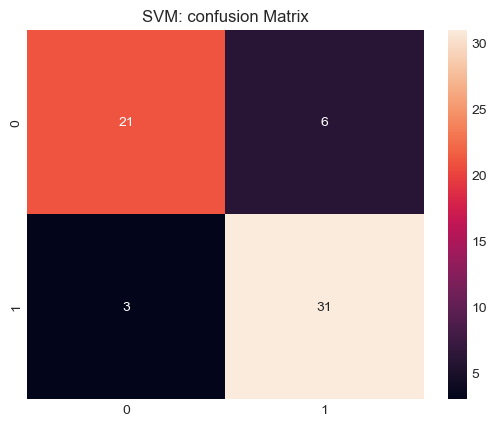

In [69]:
svm =SVC(C=0.01,degree=1,gamma=0.1, kernel="linear",random_state=102)
svm.fit(X_train,y_train)
# predicting the values
y_pred = svm.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("SVM: confusion Matrix")
fig = confusion.get_figure()
fig.savefig(save_folder+"SVM_confusion.pdf")
cv_result = cross_val_score(svm,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result)
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

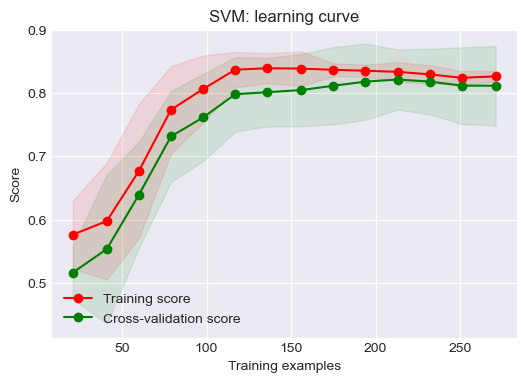

In [72]:
svm =SVC(C=0.01,gamma=0.1, kernel="linear",random_state=102)
title = 'SVM: learning curve'
plot_learning_curve(svm,title,X,y.squeeze(1),cv=10,n_jobs=-1)
plt.savefig(save_folder+ "SVM learning curve.pdf")

In [92]:
# test_acc_svm_c = []

Cs = [0.0001,0.001,0.01,0.1,1.0,10.0,100,1000]
kernals = ['poly','sigmoid','rbf','linear']
train_acc_svm_c = np.zeros((len(kernals),len(Cs)))
cv_mean = np.zeros((len(kernals),len(Cs)))
cv_std = np.zeros((len(kernals),len(Cs)))
for i,kernal in enumerate(kernals):
    for j,C in enumerate(Cs):
        svm =SVC(C=C,degree=1,gamma=0.1, kernel=kernal,random_state=102)
        cv_result = cross_val_score(svm,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
    
        svm.fit(X_train,y_train)
#     # predicting the values
        y_pred_train = svm.predict(X_train)
#     y_pred = svm.predict(X_test)
#     # printing the test accuracy
        accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
        train_acc_svm_c[i,j] = (round(100*accuracy_train,0))
#     test_acc_svm_c.append(round(100*accuracy_test,0))

# print("samples used: ",Cs)
print("The train accuracies score of SVM is ", train_acc_svm_c)
# print("The test accuracies score of SVM is ", test_acc_svm_c)

The train accuracies score of SVM is  [[ 54.  54.  54.  82.  83.  86.  90.  89.]
 [ 54.  54.  54.  82.  82.  78.  76.  78.]
 [ 54.  54.  54.  82.  86.  97. 100. 100.]
 [ 54.  54.  82.  83.  86.  90.  89.  89.]]


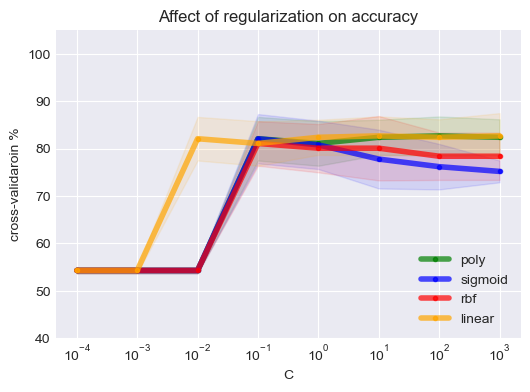

In [93]:
plt.figure(figsize=(6,4))
plt.plot(Cs, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="poly")
plt.fill_between(Cs,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(Cs, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="sigmoid")
plt.fill_between(Cs,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(Cs, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="rbf")
plt.fill_between(Cs,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")
plt.plot(Cs, cv_mean[3], marker='.', color='orange', linewidth=4, alpha=0.7, label="linear")
plt.fill_between(Cs,cv_mean[3]-cv_std[3],cv_mean[3]+cv_std[3],alpha=0.1, color="orange")


plt.title("Affect of regularization on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
ax.set_xscale('log')

# plt.plot(Cs,test_acc_svm_c,label='testing accuracy',color='blue',marker='o', linewidth=2, alpha=0.7)
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('cross-validaroin %')
plt.savefig(save_folder+ "SVM regularization.pdf")

In [110]:
gammas = [0.001,0.01,0.1,1.0,10.0,100]
kernals = ['poly','sigmoid','rbf','linear']
# test_acc_svm_gamma = np.zeros((len(kernals),len(gammas)))
train_acc_svm_gamma = np.zeros((len(kernals),len(gammas)))
cv_mean = np.zeros((len(kernals),len(gammas)))
cv_std = np.zeros((len(kernals),len(gammas)))
for i,kernal in enumerate(kernals):
    for j,gamma in enumerate(gammas):
        svm =SVC(C=0.1,degree=1,gamma=gamma, kernel=kernal,random_state=102)

        cv_result = cross_val_score(svm,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
        
        svm =SVC(C=0.1,degree=1,gamma=gamma, kernel=kernal,random_state=102)
        svm.fit(X_train,y_train)
#     # predicting the values
        y_pred_train = svm.predict(X_train)
#     y_pred = svm.predict(X_test)
#     # printing the test accuracy
        accuracy_train = accuracy_score(y_train, y_pred_train)
        train_acc_svm_gamma[i,j] = accuracy_train

# print("samples used: ",gammas)
print("The train accuracies score of SVM is ", train_acc_svm_gamma)
# print("The test accuracies score of SVM  is ", test_acc_svm_gamma)

The train accuracies score of SVM is  [[0.53941909 0.53941909 0.81742739 0.82572614 0.86307054 0.89626556]
 [0.53941909 0.53941909 0.82157676 0.74688797 0.63070539 0.65975104]
 [0.53941909 0.53941909 0.81742739 0.53941909 0.53941909 0.53941909]
 [0.82572614 0.82572614 0.82572614 0.82572614 0.82572614 0.82572614]]


In [111]:
cv_mean

array([[54.3, 54.3, 82.1, 81.1, 82.4, 82.7],
       [54.3, 54.3, 82.1, 77.4, 69.9, 70.5],
       [54.3, 54.3, 81.1, 54.3, 54.3, 54.3],
       [81.1, 81.1, 81.1, 81.1, 81.1, 81.1]])

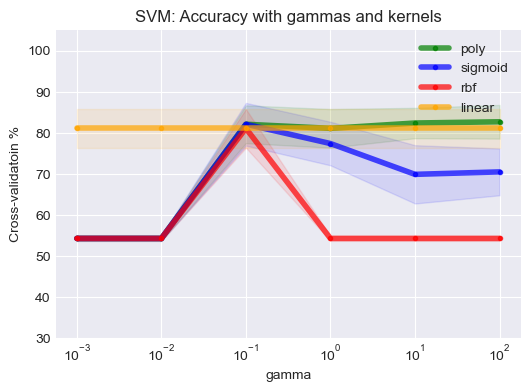

In [112]:
plt.figure(figsize=(6,4))
plt.plot(gammas, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="poly")
plt.fill_between(gammas,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(gammas, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="sigmoid")
plt.fill_between(gammas,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(gammas, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="rbf")
plt.fill_between(gammas,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")
plt.plot(gammas, cv_mean[3], marker='.', color='orange', linewidth=4, alpha=0.7, label="linear")
plt.fill_between(gammas,cv_mean[3]-cv_std[3],cv_mean[3]+cv_std[3],alpha=0.1, color="orange")

plt.legend(loc='best')
ax = plt.gca()
ax.set_ylim([30, 105])
ax.set_xscale('log')
plt.xlabel("gamma")
plt.ylabel("Cross-validatoin %")
plt.title("SVM: Accuracy with gammas and kernels")
# plt.show()
plt.savefig(save_folder+ "SVM gammas and kernels.pdf")

##  Decision Tree

In [129]:
# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'ccp_alpha': [0.1, .01, .001],
#               'max_depth' : np.arange(2,20,2),
#               'criterion' :['gini', 'entropy'],
#               'random_state':[102,7,88,91]
#              }
# grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_dt.fit(X_train, y_train)

In [130]:
# print("Best parameters set found on development set:")
# print(grid_dt.best_params_)
# print(grid_dt.best_score_)

In [131]:
dt =DecisionTreeClassifier(ccp_alpha= 0.01,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)
%timeit dt.fit(X_train,y_train)


# predicting the values
%timeit y_pred = dt.predict(X_test)

1.32 ms ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
748 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


8
The train accuracy score of DT is  0.8755186721991701
The test accuracy score of DT is  0.7049180327868853
0.7082513661202186
0.7868852459016393
0.053784040231896674


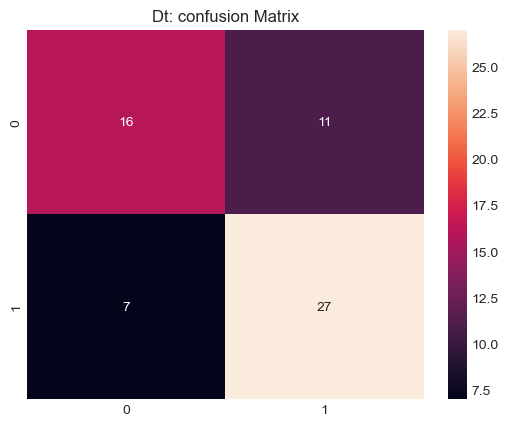

In [21]:

dt =DecisionTreeClassifier(ccp_alpha= 0.01,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)
dt.fit(X_train,y_train)

print(dt.max_depth)
# predicting the values
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("Dt: confusion Matrix")
fig1 = confusion.get_figure()
fig1.savefig(save_folder+"DT_confusion.pdf")

cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

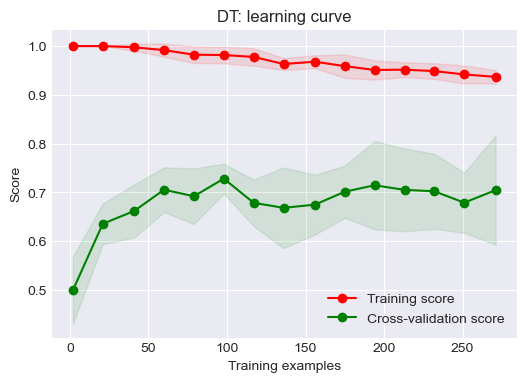

In [147]:
dt =DecisionTreeClassifier( criterion='gini',max_depth=8,max_features='sqrt',random_state=102)
title = 'DT: learning curve'
plot_learning_curve(dt,title,X,y.squeeze(1),cv=10,n_jobs=-1)
# plt.show()
plt.savefig(save_folder+ "DT learning curve.pdf")

In [56]:
# test_acc_dt_depth = []
train_acc_dt_depth = []
criterions = ['gini', 'entropy']
max_depths = list(np.arange(1,26))
cv_mean = np.zeros((len(criterions),len(max_depths)))
cv_std = np.zeros((len(criterions),len(max_depths)))
train_acc_dt_depth = np.zeros((len(criterions),len(max_depths)))
for i, criterion in enumerate(criterions):    
    for j,depth in enumerate(max_depths):
        dt =DecisionTreeClassifier(ccp_alpha= 0.01, criterion=criterion,max_depth=depth,max_features='sqrt',random_state=102)
        cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
        
        dt =DecisionTreeClassifier(ccp_alpha= 0.01, criterion=criterion,max_depth=depth,max_features='sqrt',random_state=102)

        dt.fit(X_train,y_train)
#     # predicting the values
        y_pred_train = dt.predict(X_train)
#     y_pred = dt.predict(X_test)
#     # printing the test accuracy
        accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
        train_acc_dt_depth[i,j] = round(100*accuracy_train,0)
#     test_acc_dt_depth.append(round(100*accuracy_test,0))

# print("samples used: ",max_depths)
# print("The train accuracies score of SVM is ", train_acc_dt_depth)
# print("The test accuracies score of SVM is ", test_acc_dt_depth)

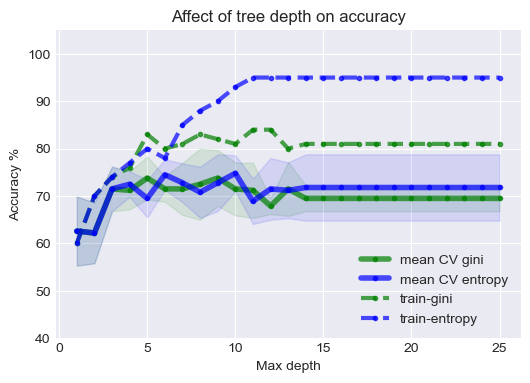

In [57]:
plt.figure(figsize=(6,4))
plt.plot(max_depths, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="mean CV gini")
plt.fill_between(max_depths,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(max_depths, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="mean CV entropy")
plt.fill_between(max_depths,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
# plt.plot(max_depths, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="log_loss")
# plt.fill_between(max_depths,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")


plt.plot(max_depths, train_acc_dt_depth[0],linestyle = '--', marker='.', color='green', linewidth=3, alpha=0.7, label="train-gini")
plt.plot(max_depths, train_acc_dt_depth[1],linestyle = '--', marker='.', color='blue', linewidth=3, alpha=0.7, label="train-entropy")

plt.title("Affect of tree depth on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
# ax.set_xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Max depth')
plt.ylabel('Accuracy %')
# plt.show()
plt.savefig(save_folder+ "DT tree depth.pdf")

In [148]:
criterions = ['gini', 'entropy']
leaf_sizes = list(np.arange(2,41))
cv_mean = np.zeros((len(criterions),len(leaf_sizes)))
cv_std = np.zeros((len(criterions),len(leaf_sizes)))
train_acc_dt_leaf = np.zeros((len(criterions),len(leaf_sizes)))

for i, criterion in enumerate(criterions):    
    for j,leaf_size in enumerate(leaf_sizes):
        dt =DecisionTreeClassifier(max_leaf_nodes=leaf_size, criterion=criterion,max_depth=8,max_features='sqrt',random_state=102)
        cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
        
        dt =DecisionTreeClassifier(max_leaf_nodes=leaf_size, criterion=criterion,max_depth=8,max_features='sqrt',random_state=102)

        dt.fit(X_train,y_train)
#     # predicting the values
        y_pred_train = dt.predict(X_train)
#     y_pred = dt.predict(X_test)
#     # printing the test accuracy
        accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
        train_acc_dt_leaf[i,j] = round(100*accuracy_train,1)
#     test_acc_dt_depth.append(round(100*accuracy_test,0))

# print("samples used: ",leaf_sizes)
# print("The train accuracies score of SVM is ", train_acc_dt_leaf_size)
# print("The test accuracies score of SVM is ", test_acc_dt_leaf_size)

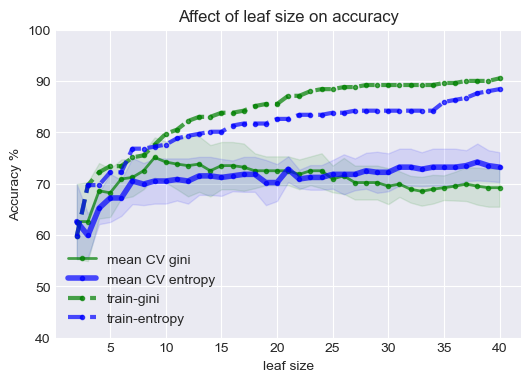

In [150]:
plt.figure(figsize=(6,4))
plt.plot(leaf_sizes, cv_mean[0], marker='.', color='green', linewidth=2, alpha=0.7, label="mean CV gini")
plt.fill_between(leaf_sizes,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(leaf_sizes, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="mean CV entropy")
plt.fill_between(leaf_sizes,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
# plt.plot(max_depths, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="log_loss")
# plt.fill_between(max_depths,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")


plt.plot(leaf_sizes, train_acc_dt_leaf[0],linestyle = '--', marker='.', color='green', linewidth=3, alpha=0.7, label="train-gini")
plt.plot(leaf_sizes, train_acc_dt_leaf[1],linestyle = '--', marker='.', color='blue', linewidth=3, alpha=0.7, label="train-entropy")

plt.title("Affect of leaf size on accuracy")
ax = plt.gca()
ax.set_ylim([40, 100])
# ax.set_xscale('log')
plt.legend(loc='best')
plt.xlabel('leaf size')
plt.ylabel('Accuracy %')
plt.savefig(save_folder+ "DT leaf size.pdf")
# plt.show()


In [65]:
ccp_alphas = [0.001,0.01,0.1,1.0,10]
# test_acc_boost_n_est = []
train_acc_boost_n_est = []
cv_mean,cv_std = np.zeros(len(ccp_alphas)),np.zeros(len(ccp_alphas))
for i,ccp_alpha in enumerate(ccp_alphas):
    dt =DecisionTreeClassifier(ccp_alpha= ccp_alpha,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)
    cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score
    cv_mean[i] = round(cv_result.mean()*100,1)
    cv_std[i] = round(cv_result.std()*100,1)
    
    dt =DecisionTreeClassifier(ccp_alpha= ccp_alpha,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)

    dt = dt.fit(X_train,y_train)
    y_pred_train = dt.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)

    train_acc_boost_n_est.append(round(100*accuracy_train,1))

    
    

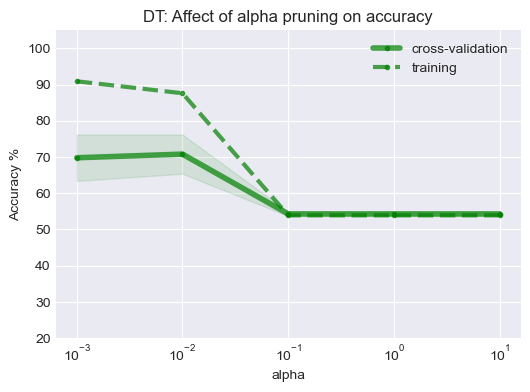

In [66]:
plt.figure(figsize=(6,4))
plt.title("DT: Affect of alpha pruning on accuracy")
ax = plt.gca()
ax.set_ylim([20, 105])
ax.set_xscale('log')
plt.plot(ccp_alphas, cv_mean, marker='.', color='green', linewidth=4, alpha=0.7, label="cross-validation")
plt.fill_between(ccp_alphas,cv_mean-cv_std,cv_mean+cv_std,alpha=0.1, color="g")
plt.plot(ccp_alphas, train_acc_boost_n_est,linestyle = '--', marker='.', color='green', linewidth=3, alpha=0.7, label="training")
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('Accuracy %')
# plt.show()
plt.savefig(save_folder+ "DT alpha.pdf")

In [37]:
ccp_alphas = [0.001,0.005,0.01,0.015,0.025,0.05,0.1,0.5]
# test_acc_boost_n_est = []
depth = []
# cv_mean,cv_std = np.zeros(len(ccp_alphas)),np.zeros(len(ccp_alphas))
for i,ccp_alpha in enumerate(ccp_alphas):
    dt =DecisionTreeClassifier(ccp_alpha= ccp_alpha,criterion='log_loss',max_depth=100,max_features='sqrt',random_state=102)
    dt.fit(X_train,y_train)
    depth.append(dt.get_depth())

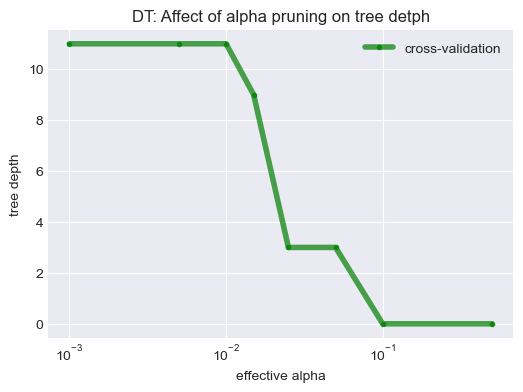

In [38]:
plt.figure(figsize=(6,4))
plt.title("DT: Affect of alpha pruning on tree detph")
ax = plt.gca()
# ax.set_ylim([20, 105])
ax.set_xscale('log')
plt.plot(ccp_alphas, depth, marker='.', color='green', linewidth=4, alpha=0.7, label="cross-validation")
plt.legend(loc='best')
plt.xlabel('effective alpha')
plt.ylabel('tree depth')
# plt.show()
plt.savefig(save_folder+ "DT alpha depth.pdf")

In [61]:
ccp_alphas = [0.001,0.01,0.1,1.0,10]
time2train = []
time2test = []
for i,ccp_alpha in tqdm(enumerate(ccp_alphas)):
    dt =DecisionTreeClassifier(ccp_alpha= ccp_alpha,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)
    start = time.time()
    dt.fit(X_train,y_train)
    time2train.append((time.time()-start)*1000)
    start = time.time()
    y_pred = dt.predict(X_test)
    time2test.append((time.time()-start)*1000)

5it [00:00, 67.50it/s]


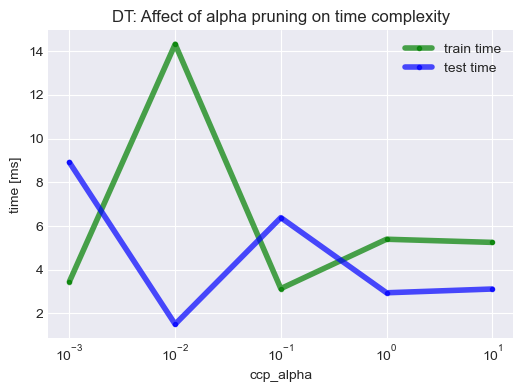

In [63]:
plt.figure(figsize=(6,4))
plt.title("DT: Affect of alpha pruning on time complexity")
ax = plt.gca()
ax.set_xscale('log')
plt.plot(ccp_alphas, time2train, marker='.', color='green', linewidth=4, alpha=0.7, label="train time")
plt.plot(ccp_alphas, time2test, marker='.', color='blue', linewidth=4, alpha=0.7, label="test time")
plt.legend(loc='best')
plt.xlabel('ccp_alpha')
plt.ylabel('time [ms]')
# plt.show()
plt.savefig(save_folder+ "DT alpha time.pdf")

## Boosing

In [67]:
# param_grid = {'learning_rate': [0.001,0.01,0.1,0.5,1.0,3.0,10.0],
#               'n_estimators': [5,7, 10,12, 15,20,35,50,100],
#               'random_state':[102,7,88,91,0,17]
#              } 
# grid_boosting = GridSearchCV( AdaBoostClassifier(), param_grid, refit = True, verbose = 3,cv=5,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_boosting.fit(X_train, y_train)
# print("Best parameters set found on development set:")
# print(grid_boosting.best_params_)

In [27]:
print(grid_boosting.best_params_)
grid_boosting.best_score_

{'learning_rate': 0.5, 'n_estimators': 10, 'random_state': 102}


0.8176870748299321

In [82]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=35, random_state=102)

%timeit adabost.fit(X_train,y_train)


# predicting the values
%timeit y_pred = adabost.predict(X_test)

49.9 ms ± 5.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.32 ms ± 646 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The train accuracy score of DT is  0.9045643153526971
The test accuracy score of DT is  0.9016393442622951
0.810655737704918
0.9016393442622951
0.0742878036745718


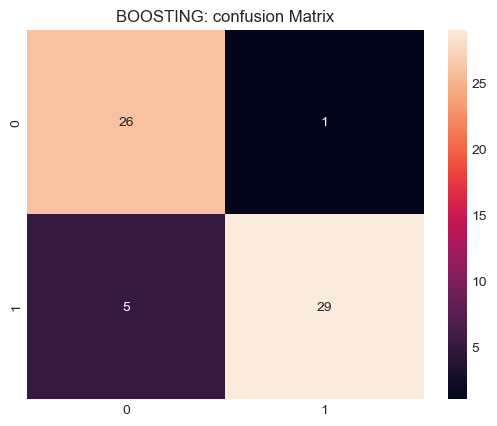

In [81]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=35, random_state=91)

adabost.fit(X_train,y_train)


# predicting the values
y_pred = adabost.predict(X_test)
y_pred_train = adabost.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("BOOSTING: confusion Matrix")
fig = confusion.get_figure()
fig.savefig(save_folder+"Boosting_confusion.pdf")
cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.max())
print(cv_result.std())

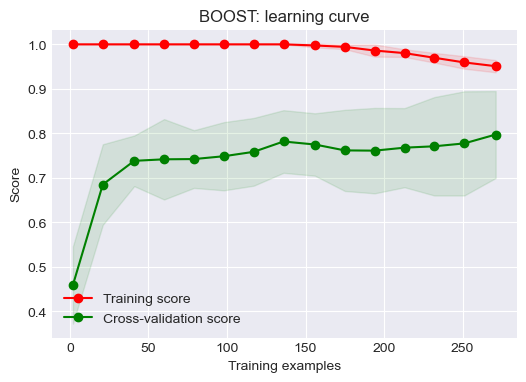

In [83]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=n_estimator, random_state=102)
title = 'BOOST: learning curve'
plot_learning_curve(adabost,title,X,y.squeeze(1),cv=10,n_jobs=-1)
plt.savefig(save_folder+"Boosting learning curve.pdf")

In [90]:
test_acc_boost_n_est = []
train_acc_boost_n_est = []
n_estimators = list(np.arange(1,100,1))
cv_mean,cv_std = np.zeros(len(n_estimators)),np.zeros(len(n_estimators))
for i,n_estimator in enumerate(n_estimators):
    adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=n_estimator, random_state=102)
    cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score
    cv_mean[i] = round(cv_result.mean()*100,1)
    cv_std[i] = round(cv_result.std()*100,1)
    adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=n_estimator, random_state=102)
    adabost.fit(X_train,y_train)
    y_pred_train = adabost.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_acc_boost_n_est.append(round(100*accuracy_train,0))


# print("n_estimators used: ",n_estimators)
# print("The train accuracies score of Boosting is ", train_acc_boost_n_est)
# print("The test accuracies score of Boosting is ", test_acc_boost_n_est)

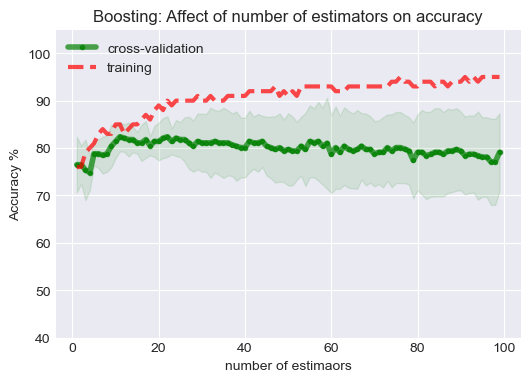

In [91]:
plt.figure(figsize=(6,4))
plt.title("Boosting: Affect of number of estimators on accuracy")
ax = plt.gca()
ax.set_ylim([40, 105])
plt.plot(n_estimators, cv_mean, marker='.', color='green', linewidth=4, alpha=0.7, label="cross-validation")
plt.fill_between(n_estimators,cv_mean-cv_std,cv_mean+cv_std,alpha=0.1, color="g")

plt.plot(n_estimators, train_acc_boost_n_est, linestyle = '--', color='red', linewidth=3, alpha=0.7, label="training")

plt.legend(loc='best')
plt.xlabel('number of estimaors')
plt.ylabel('Accuracy %')
plt.savefig(save_folder+ "Boosting number of estimators.pdf")

In [92]:
test_acc_boost_lr= []
train_acc_boost_lr = []
lrs = [0.01,0.1,1.0,10,30]
cv_mean,cv_std = np.zeros(len(lrs)),np.zeros(len(lrs))
for i,lr in enumerate(lrs):
    adabost = AdaBoostClassifier(learning_rate=lr,n_estimators=35, random_state=91)
    cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score
    cv_mean[i] = round(cv_result.mean()*100,1)
    cv_std[i] = round(cv_result.std()*100,1)
    adabost.fit(X_train,y_train)
    # predicting the values
    y_pred_train = adabost.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_acc_boost_lr.append(round(100*accuracy_train,0))

# print("n_estimators used: ",lrs)
# print("The train accuracies score of Boosting is ", train_acc_boost_lr)
# print("The test accuracies score of Boosting is ", test_acc_boost_lr)

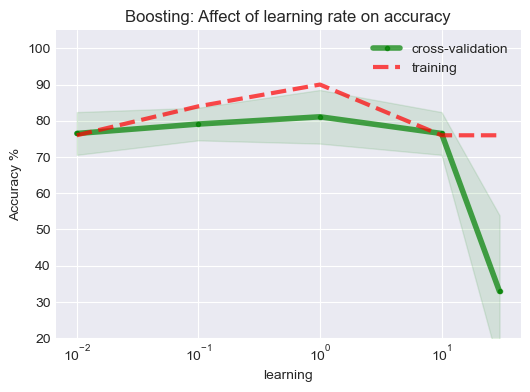

In [94]:
plt.figure(figsize=(6,4))
plt.title("Boosting: Affect of learning rate on accuracy")
ax = plt.gca()
ax.set_ylim([20, 105])
ax.set_xscale('log')
plt.plot(lrs, cv_mean, marker='.', color='green', linewidth=4, alpha=0.7, label="cross-validation")
plt.fill_between(lrs,cv_mean-cv_std,cv_mean+cv_std,alpha=0.1, color="g")
plt.plot(lrs, train_acc_boost_lr,linestyle = '--', color='red', linewidth=3, alpha=0.7, label="training")

plt.legend(loc='best')
plt.xlabel('learning')
plt.ylabel('Accuracy %')
# plt.show()
plt.savefig(save_folder+ "Boosting learning rate.pdf")

## KNN

In [51]:
# param_grid = {'n_neighbors': np.arange(1,20),
#               'weights': ['uniform','distance'],
#               'algorithm':['auto','ball_tree','kd_tree','brute'],
#               'leaf_size':[5,10,15,20,30,50,100]
#              } 
# grid_knn = GridSearchCV( KNeighborsClassifier(), param_grid, refit = True, verbose = 3,cv=6,
#                            scoring='accuracy',n_jobs=-1)
  
# # fitting the model for grid search
# grid_knn.fit(X_train, y_train.squeeze(1))
# print("Best parameters set found on development set:")
# print(grid_knn.best_params_)

In [52]:
# print(grid_knn.best_params_)
# grid_knn.best_score_

In [ ]:
knn = KNeighborsClassifier(algorithm='auto',leaf_size=5,n_neighbors=7,weights='distance')
# knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 5, n_neighbors= 4, weights= 'distance')

%timeit knn.fit(X_train,y_train)
# predicting the values
%timeit y_pred = knn.predict(X_test)

The train accuracy score of DT is  0.8257261410788381
The test accuracy score of DT is  0.8524590163934426
0.7977595628415302
0.7977595628415302
0.047263937430357686


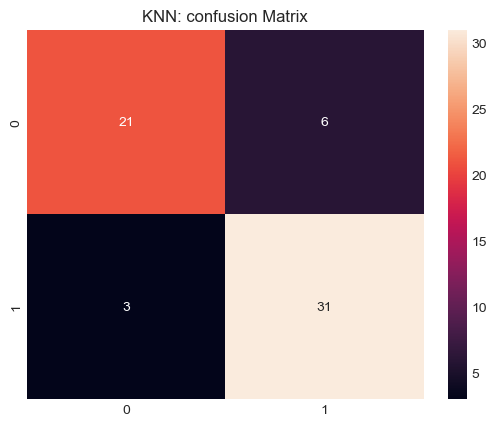

In [26]:
knn = KNeighborsClassifier(algorithm='auto',leaf_size=5,n_neighbors=7,weights='distance')
# knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 5, n_neighbors= 4, weights= 'distance')

knn.fit(X_train,y_train)
# predicting the values
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
confusion = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
confusion.set_title("KNN: confusion Matrix")
fig = confusion.get_figure()
fig.savefig(save_folder+"KNN_confusion.pdf")
cv_result = cross_val_score(knn,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result.mean())
print(cv_result.mean())
print(cv_result.std())

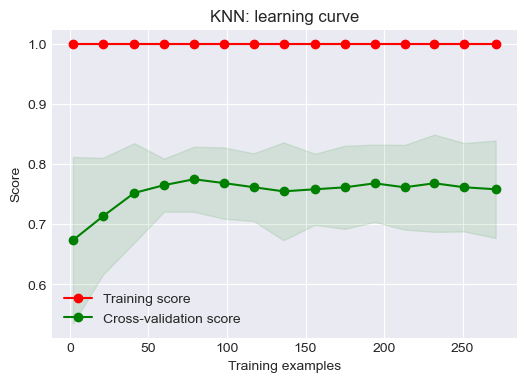

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
title = 'KNN: learning curve'
plot_learning_curve(knn,title,X,y.squeeze(1),cv=10)
# plt.show()
plt.savefig(save_folder+ "KNN learning curve.pdf")

In [37]:
n_neighbors = np.arange(1,100)
# test_acc_knn_n_neighbors= np.zeros(len(n_neighbors))
train_acc_knn_n_neighbors = np.zeros(len(n_neighbors))
cv_mean ,cv_std = np.zeros(len(n_neighbors)),np.zeros(len(n_neighbors))

for i, n_neighbor in enumerate(n_neighbors):
    knn = KNeighborsClassifier(algorithm='auto',n_neighbors=n_neighbor,weights='distance')
    cv_result = cross_val_score(knn,X,y.squeeze(1)) # uses R^2 as score
    cv_mean[i] = round(cv_result.mean()*100,1)
    cv_std[i] = round(cv_result.std()*100,1)
    
    knn = KNeighborsClassifier(algorithm='auto',n_neighbors=n_neighbor,weights='distance')
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_acc_knn_n_neighbors[i] = round(100*accuracy_train,0)
#     test_acc_knn_n_neighbors[i] =round(100*cv_result.mean(),0)
#     stds[i] = round(100*cv_result.std(),1)
# print("n_estimators used: ",n_neighbors)
# print("The train accuracies score of Boosting is ", train_acc_knn_n_neighbors)
# print("The test accuracies score of Boosting is ", test_acc_knn_n_neighbors)

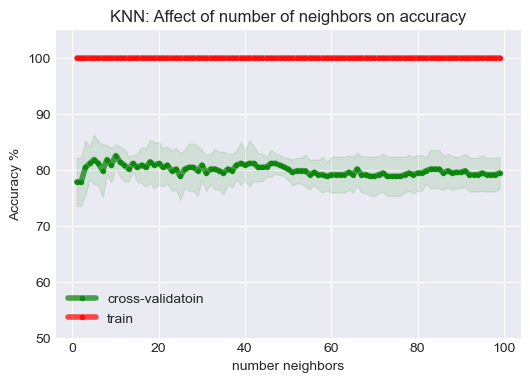

In [41]:
plt.figure(figsize=(6,4))
plt.plot(n_neighbors, cv_mean, marker='.', color='green', linewidth=4, alpha=0.7, label="cross-validatoin")
plt.fill_between(n_neighbors,cv_mean-cv_std,cv_mean+cv_std,alpha=0.1, color="g")
plt.plot(n_neighbors, train_acc_knn_n_neighbors, marker='.', color='red', linewidth=4, alpha=0.7, label="train")


plt.title("KNN: Affect of number of neighbors on accuracy")
ax = plt.gca()
ax.set_ylim([50, 105])
plt.legend(loc='best')
plt.xlabel('number neighbors')
plt.ylabel('Accuracy %')
# plt.show()
plt.savefig(save_folder+ "KNN number of neighbors2.pdf")

In [28]:

n_neighbors = np.arange(1,100)
# test_acc_knn_n_neighbors= np.zeros(len(n_neighbors))
# train_acc_knn_n_neighbors = np.zeros(len(n_neighbors))
algorithms = ['auto','ball_tree','kd_tree','brute']
cv_mean ,cv_std = np.zeros((len(algorithms),len(n_neighbors))),np.zeros((len(algorithms),len(n_neighbors)))
for i,algorithm in enumerate(algorithms):
    for j, n_neighbor in enumerate(n_neighbors):
        knn = KNeighborsClassifier(algorithm=algorithm,n_neighbors=n_neighbor,weights='distance')
        cv_result = cross_val_score(knn,X,y.squeeze(1)) # uses R^2 as score
        cv_mean[i,j] = round(cv_result.mean()*100,1)
        cv_std[i,j] = round(cv_result.std()*100,1)
#     knn.fit(X_train,y_train.squeeze(1))
#     # predicting the values
#     y_pred_train = knn.predict(X_train)
#     y_pred = knn.predict(X_test)
#     cv_result = cross_val_score(knn,X,y.squeeze(1)) # uses R^2 as score 
#     # printing the test accuracy
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_test = accuracy_score(y_test, y_pred)
#     train_acc_knn_n_neighbors[i] = round(100*accuracy_train,0)
#     test_acc_knn_n_neighbors[i] =round(100*cv_result.mean(),0)
#     stds[i] = round(100*cv_result.std(),1)
# print("n_estimators used: ",n_neighbors)
# print("The train accuracies score of Boosting is ", train_acc_knn_n_neighbors)
# print("The test accuracies score of Boosting is ", test_acc_knn_n_neighbors)

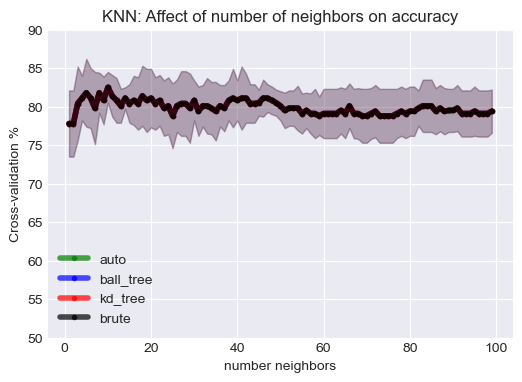

In [29]:
plt.figure(figsize=(6,4))
plt.plot(n_neighbors, cv_mean[0], marker='.', color='green', linewidth=4, alpha=0.7, label="auto")
plt.fill_between(n_neighbors,cv_mean[0]-cv_std[0],cv_mean[0]+cv_std[0],alpha=0.1, color="g")
plt.plot(n_neighbors, cv_mean[1], marker='.', color='blue', linewidth=4, alpha=0.7, label="ball_tree")
plt.fill_between(n_neighbors,cv_mean[1]-cv_std[1],cv_mean[1]+cv_std[1],alpha=0.1, color="b")
plt.plot(n_neighbors, cv_mean[2], marker='.', color='red', linewidth=4, alpha=0.7, label="kd_tree")
plt.fill_between(n_neighbors,cv_mean[2]-cv_std[2],cv_mean[2]+cv_std[2],alpha=0.1, color="r")
plt.plot(n_neighbors, cv_mean[3], marker='.', color='black', linewidth=4, alpha=0.7, label="brute")
plt.fill_between(n_neighbors,cv_mean[3]-cv_std[3],cv_mean[3]+cv_std[3],alpha=0.1, color="black")

plt.title("KNN: Affect of number of neighbors on accuracy")
ax = plt.gca()
ax.set_ylim([50, 90])
plt.legend(loc='best')
plt.xlabel('number neighbors')
plt.ylabel('Cross-validation %')
# plt.show()
plt.savefig(save_folder+ "KNN number of neighbors .pdf")

In [160]:

n_neighbors = np.arange(1,102,3)
# test_acc_knn_n_neighbors= np.zeros(len(n_neighbors))
# train_acc_knn_n_neighbors = np.zeros(len(n_neighbors))
algorithms = ['auto','ball_tree','kd_tree','brute']
time2train = np.zeros((len(algorithms),len(n_neighbors)))
time2test = np.zeros((len(algorithms),len(n_neighbors)))
# cv_mean ,cv_std = np.zeros((len(algorithms),len(n_neighbors))),np.zeros((len(algorithms),len(n_neighbors)))
for i,algorithm in enumerate(algorithms):
    for j, n_neighbor in tqdm(enumerate(n_neighbors)):
        sums = []
        for _ in range(10):
            knn = KNeighborsClassifier(algorithm=algorithm,n_neighbors=n_neighbor,weights='distance')
            knn.fit(X_train,y_train)
            start = time.time()
            y_pred = knn.predict(X)
            sums.append(time.time()-start)
        time2test[i,j]= sum(sums)/len(sums)
# print("n_estimators used: ",n_neighbors)
# print("The train accuracies score of Boosting is ", train_acc_knn_n_neighbors)
# print("The test accuracies score of Boosting is ", test_acc_knn_n_neighbors)

34it [00:05,  6.29it/s]
34it [00:02, 11.55it/s]
34it [00:03, 11.11it/s]
34it [00:05,  6.32it/s]


In [161]:
# plt.figure(figsize=(6,4))
# plt.plot(n_neighbors, time2train[0]*100, marker='.', color='green', linewidth=4, alpha=0.7, label="train-auto")
# plt.plot(n_neighbors, time2train[1]*100, marker='.', color='blue', linewidth=4, alpha=0.7, label="train-ball_tree")
# plt.plot(n_neighbors, time2train[2]*100, marker='.', color='red', linewidth=4, alpha=0.7, label="train-kd_tree")
# plt.plot(n_neighbors, time2train[3]*100, marker='.', color='black', linewidth=4, alpha=0.7, label="train-brute")


# plt.title("KNN: Affect of algorithm and number of neighbors on training time")
# ax = plt.gca()
# # ax.set_ylim([60, 100])
# plt.legend(loc='best')
# plt.xlabel('number neighbors')
# plt.ylabel('Time [ms]')
# plt.savefig(save_folder+ "KNN time complexity number of neighbors training .pdf")

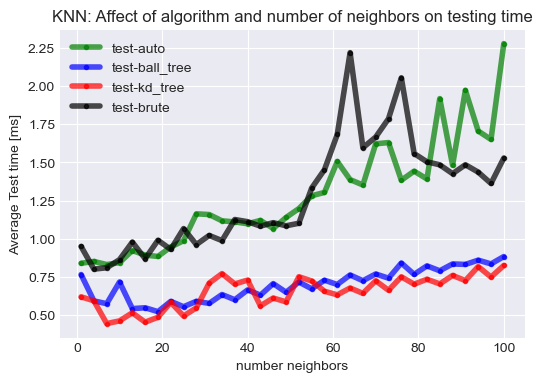

In [166]:
plt.figure(figsize=(6,4))
plt.plot(n_neighbors, time2test[3]*100, marker='.', color='green', linewidth=4, alpha=0.7, label="test-auto")
plt.plot(n_neighbors, time2test[2]*100, marker='.', color='blue', linewidth=4, alpha=0.7, label="test-ball_tree")
plt.plot(n_neighbors, time2test[1]*100,marker='.', color='red', linewidth=4, alpha=0.7, label="test-kd_tree")
plt.plot(n_neighbors, time2test[0]*100,marker='.', color='black', linewidth=4, alpha=0.7, label="test-brute")

plt.title("KNN: Affect of algorithm and number of neighbors on testing time")
ax = plt.gca()
# ax.set_ylim([60, 100])
plt.legend(loc='best')
plt.xlabel('number neighbors')
plt.ylabel('Average Test time [ms]')
plt.savefig(save_folder+ "KNN time complexity number of neighbors testing .pdf")

# Conclusion

## ANN

In [50]:
clf = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=1000)
%timeit clf.fit(X_train,y_train)
# predicting the values
%timeit y_pred = clf.predict(X_test)

12.8 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.26 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
clf = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=1000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


cv_result = cross_val_score(clf,X,y.squeeze(1)) # uses R^2 as score 
print("test split accuracy: ", round(100*accuracy_score(y_pred,y_test),2) )
print("mean cv: ",round(100*cv_result.mean(),2))
print("std cv: ",round(100*cv_result.std(),2))

test split accuracy:  82.89
mean cv:  83.76
std cv:  3.28


## SVM

In [38]:
svm =SVC(C=0.01,degree=1,gamma=0.1, kernel="linear",random_state=102)
%timeit svm.fit(X_train,y_train)
# predicting the values
%timeit svm.predict(X_test)

3.38 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.68 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [39]:
svm =SVC(C=0.01,degree=1,gamma=0.1, kernel="linear",random_state=102)
svm.fit(X_train,y_train)
# predicting the values
y_pred = svm.predict(X_test)

cv_result = cross_val_score(svm,X,y.squeeze(1),cv=5) # uses R^2 as score 
print("test split accuracy: ", round(100*accuracy_score(y_pred,y_test),2) )
print("mean cv: ",round(100*cv_result.mean(),2))
print("std cv: ",round(100*cv_result.std(),2))

test split accuracy:  81.58
mean cv:  82.1
std cv:  4.65


## DT

In [40]:
dt =DecisionTreeClassifier(ccp_alpha= 0.01,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)
%timeit dt.fit(X_train,y_train)


# predicting the values
%timeit y_pred = dt.predict(X_test)

2.35 ms ± 253 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.4 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [41]:

dt =DecisionTreeClassifier(ccp_alpha= 0.01,criterion='log_loss',max_depth=8,max_features='sqrt',random_state=102)
dt.fit(X_train,y_train)


y_pred = dt.predict(X_test)


cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score 
print("test split accuracy: ", round(100*accuracy_score(y_pred,y_test),2) )
print("mean cv: ",round(100*cv_result.mean(),2))
print("std cv: ",round(100*cv_result.std(),2))

test split accuracy:  75.0
mean cv:  70.83
std cv:  5.38


## Boosting

In [42]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=35, random_state=102)

%timeit adabost.fit(X_train,y_train)


# predicting the values
%timeit y_pred = adabost.predict(X_test)

67.4 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.05 ms ± 702 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
adabost = AdaBoostClassifier(learning_rate=1.0,n_estimators=35, random_state=91)

adabost.fit(X_train,y_train)


# predicting the values
y_pred = adabost.predict(X_test)

cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score 
print("test split accuracy: ", round(100*accuracy_score(y_pred,y_test),2) )
print("mean cv: ",round(100*cv_result.mean(),2))
print("std cv: ",round(100*cv_result.std(),2))

test split accuracy:  84.21
mean cv:  81.07
std cv:  7.43


## KNN

In [44]:
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=5,n_neighbors=7,weights='distance')
# knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 5, n_neighbors= 4, weights= 'distance')

%timeit knn.fit(X_train,y_train)
# predicting the values
%timeit y_pred = knn.predict(X_test)

1.9 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.23 ms ± 59 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=5,n_neighbors=7,weights='distance')
# knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 5, n_neighbors= 4, weights= 'distance')

knn.fit(X_train,y_train)
# predicting the values
y_pred = knn.predict(X_test)
cv_result = cross_val_score(knn,X,y.squeeze(1),cv=5) # uses R^2 as score 
print("test split accuracy: ", round(100*accuracy_score(y_pred,y_test),2) )
print("mean cv: ",round(100*cv_result.mean(),2))
print("std cv: ",round(100*cv_result.std(),2))

test split accuracy:  82.89
mean cv:  79.78
std cv:  4.73
